# Income Classification
--------
In this notebook I will be looking at classifying the income bracket of various samples, whether the features predict an income:

__Greater than 50k__ or __less than 50k__

--------
*Data from: https://www.kaggle.com/lodetomasi1995/income-classification*

---------

In [1]:
## Import required packages
# Data processing
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sn

# SkLearn packages
from sklearn.ensemble import RandomForestClassifier # Ensemble = combination of models - in this case, combination of decision trees
from sklearn.preprocessing import LabelEncoder # Enconding any columns, RF requires numerical inputs
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.model_selection import train_test_split # Split data into testing and training sets

In [2]:
# Import our data
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. ML Practice Projects\Income Classification\income_evaluation.csv")
df_copy = df.copy()

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


__Target__ : 
- "income"

__Features__ : 	
- "age"	
- "workclass"	
- "fnlwgt" | *Unsure of what this column represents - will have to drop it*
- "education"	
- "education-num"	
- "marital-status"	
- "occupation"	
- "relationship"	
- "race"	
- "sex"	
- "capital-gain"	
- "capital-loss"	
- "hours-per-week"	
- "native-country"


_The __features__ aren't final, we'll be narrowing down the best features to use to predict our __target__ throughout the notebook_

---------

## Task brain-dump

In this section we'll need to go over what needs to be done to sucessfully complete the task at hand.

__1)__ Rename columns to have underscores instead of hyphens ☑ 

__2)__ Drop any columns with no value/context: "fnlwgt"  ☑

__3)__ Encode data

__4)__ Visualize each __Feature__ against the __Target__
    - Is the feature a viable for our model/goal?
    - See the data relationship
   
__5)__ Have a unique section presenting the encoded label vs. actual label name
    
__6)__ Fit RF model

----------

### Data processing - initial
--------

In [5]:
# Calling data columns
cols = df.columns
cols

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
# Renaming columns
rename_cols = {" workclass" : "workclass", 
               " education" : "education", 
               " education-num" : "education_num",  
               ' marital-status' : 'marital_status', 
               ' occupation' : 'occupation', 
               ' relationship' : 'relationship', 
               ' race' : 'race', 
               ' sex' : 'sex', 
               ' capital-gain': 'capital_gain', 
               ' capital-loss' : 'capital_loss', 
               ' hours-per-week' :  "hours_per_week", 
               ' native-country' : 'native_country', 
               ' income' : 'income'}

df = df.rename(columns=rename_cols)
df_copy = df_copy.rename(columns=rename_cols)

In [7]:
df.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [8]:
# Dropping columns
df.drop(' fnlwgt', axis=1, inplace=True)

In [9]:
df.head(1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [10]:
# Getting column labels again after processing
cols = df.columns
cols

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [11]:
# Look for null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

No null values, so no further cleaning is required here

## Encode data

In this section I'll __encode__ any columns that are strings/not a number

Columns to ignore:
- Age
- Education num
- Capital gain
- Capital loss
- Hours per week

We'll need to ignore these columns as they, 1) already contain numerical data, 2) important to have in their current format
- E.g. Age 40, means the individual is 40, if encoded, that 40 can become 5 or any other random number.
------------

In [12]:
# Importing label encoder
le = LabelEncoder()

In [13]:
# Calling column that need to be encoded
cols_encode = ['workclass', 'education', 'marital_status', 
               'occupation', 'relationship', 'race', 
               'sex', 'native_country', 'income']

In [14]:
# Print df copy
df_copy

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df_copy['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [16]:
# Encoding columns - many at once
df[cols_encode] = df[cols_encode].apply(LabelEncoder().fit_transform)
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,11,9,4,1,3,4,1,0,0,20,39,0


Presenting the original string -> encoded data.

This is so we know what's _what_

__Target (income)__:

    <50K -> 0 
        
    >50K -> 1

## Data visualisation

#### What to do vs. What not to do Correlation)

In this section, let's visualise each feature against the target.

With the purpose of this task being to determine the relationship between a given feature and the target.

-------

#### What not to do - Correlation:

__Don't use a scatter plot, unless for a regression problem, a scatter won't show a relationship well in a classification probelm__

This is a poor method of displaying the variable relationship; because these plots don't really show a correlation between the variables, we should instead use a __heatmap__ for this task.

---------

#### What to do - Correlation:

<AxesSubplot:>

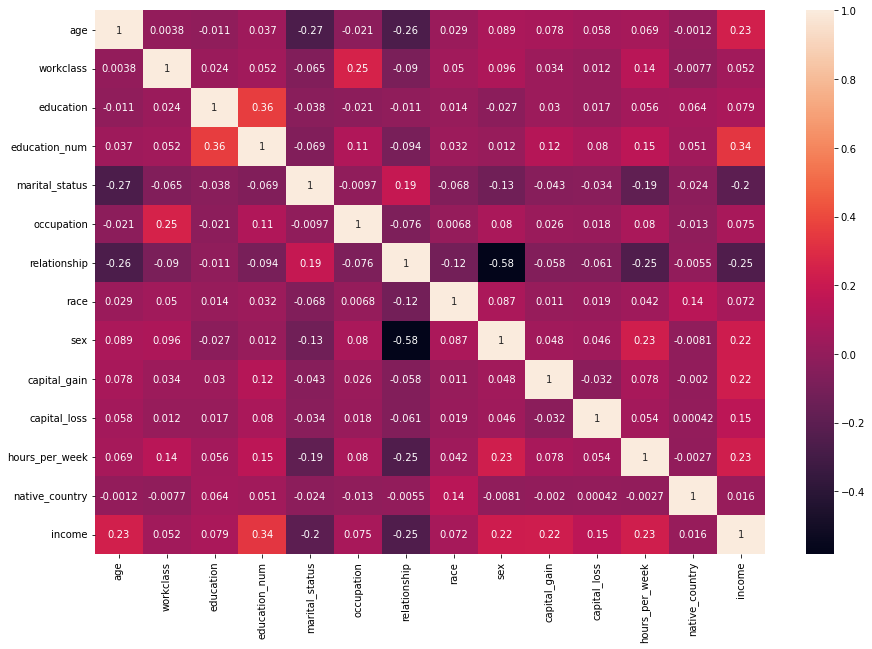

In [18]:
# Plotting correlation heatmap
corr = df.corr() # extract the correlation of variables from the df

# Plotting the heatmap 
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True)  # quantifying the relationship

This method of visualising the correlation is superior becuase we can:
1) __See the correlation between every variable against one another.__ 

2) __See the actual, quantified relationship between the variables__; to see what has a strong relationship and what doesn't.


We may want to disregard "relationship" and "marital_status" in our end model to predict the income bracket, this is because these variables appear to have a _negative_ correlation against income.

--------

## Model prep
----------

In [19]:
# Extracting features
features = df.drop(columns=['income', 'relationship', 'marital_status'], axis='columns')
feats = df.drop(columns=['income'], axis='columns')

# Extracting target
target = df['income']

## Model fitting
---------

In [20]:
# Splittig our data into testing/training sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [21]:
# Viewing the split data
print(f"The size of our training set is: {x_train.shape}")
print(f"The size of our test set is: {x_test.shape}")

The size of our training set is: (26048, 11)
The size of our test set is: (6513, 11)


In [22]:
# Importing the random forest model
model = RandomForestClassifier(n_estimators=15)#(n_estimators=) 
    # *n_estimators* - number of Decision Trees

In [23]:
# Fitting our model
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

In [24]:
# Let's see the score of our model
model.score(x_test, y_test)

0.8289574696760326

## Confusion Matrix

In [25]:
# Get our model's predicted values
y_predicted = model.predict(x_test)

# Fit the confusion matrix
## Syntax: y_test (truth) first *then* y_predicted (predicted) second
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[4530  416]
 [ 698  869]]


Text(114.0, 0.5, 'Truth Values')

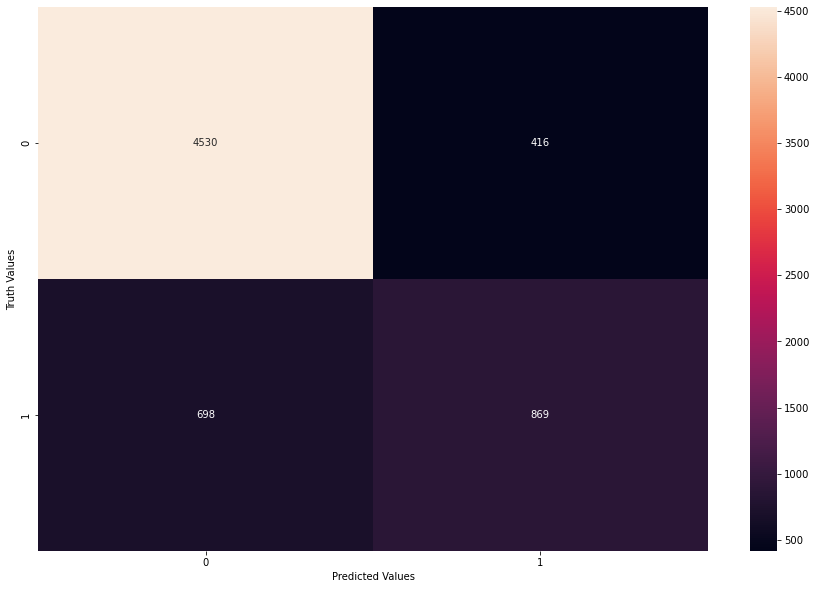

In [26]:
# Visualise the CM
plt.figure(figsize=(15,10))

# Plot CM
sn.heatmap(cm, annot=True, fmt="d")

# Plot labels
plt.xlabel("Predicted Values")
plt.ylabel("Truth Values")

Our confusion matrix show us a few things:
1) Many people make less or equal to 50k

2) Our model wasn't entirely accurate;
    - When the true value was 0, our model predicted 1 - 497 times
    - When the true value was 1, out model predicted 0 - 684 times
    
3) Out of 32561 samples, our model missed 1181 times